## Loading Libraries

In [ ]:
#!/usr/bin/env python3

# Importing necessary packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Exploring Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [ ]:
# Viewing the first 5 rows
print('\nFirst 5 rows of the dataset:\n')
print(df.head())

# Explore data
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
print('\nSummary of the dataset:\n')
print(df.describe())
print('\nAbout the dataset:\n')
print (df.info())
print('\nDatatypes for the columns:\n')
print(df.dtypes)



First 5 rows of the dataset:

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

#### Discussion:
From the above execution, we are able to see that the dataframe has:
  * 284807 rows
  * 31 columns

Most of these attributes are a result of PCA that was performed on the original dataset. Hence, we are not aware of the real world significance of them.

The statistical summary of the dataset shows there are no missing values for any of the attribute. We are also able to see the mean, std, min, max and the percentile values for each attribute. Most of the attributes are numeric, either float of integer values.



Histograms for the dataset:

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64


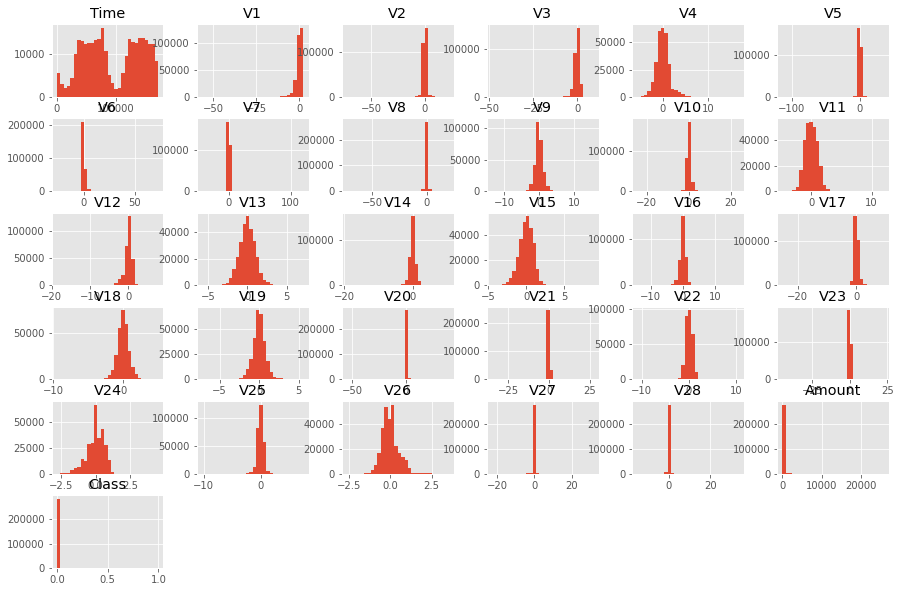

In [ ]:
# Histograms for every attribute
print('\nHistograms for the dataset:\n')
df.hist(bins=30, figsize=(15, 10))

# Skewness
skew_ = df.skew()
print(skew_)


####Discussion:
From the above set of Histograms describing the distribution for each attributes individually, we are able to see that:
1. Dataset is heavily imbalanced, as there are more non fraudulet transactions than fraudulent transactions.
2. Most of the attributes and normally distributed



In [ ]:
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


#### Discussion:

Since there are only two non-anonymised columns, namely:
1. Time
2. Amount

We have hence decided to investigate more about them.


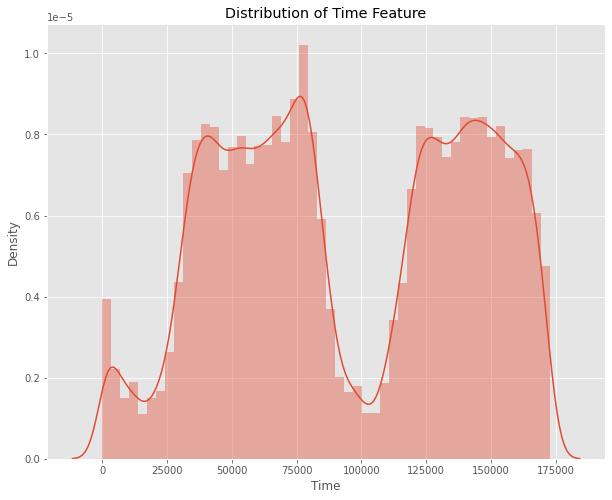

In [ ]:
# Visualizations of Time feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

#### Discusion:
By definition of Time in the metadata, we know that time here represents the number of seconds elapsed between this transaction and the first transaction in the dataset. Hence, it's not something we will be concentrating on.

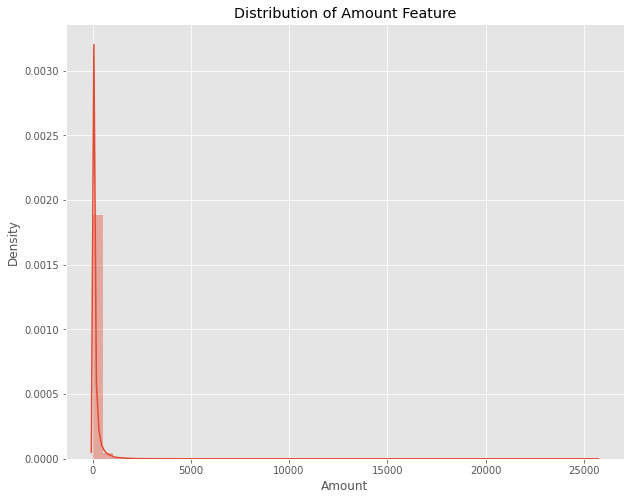

In [ ]:
# Visualizations of Amount feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Amount Feature')
sns.distplot(df.Amount)

#### Discusion:
From the statistic shown earlier we know that the mean amount is about 88, but we are also able to see from this visualisation that the biggest transaction had a monetary value of around 25,691 dollars. Unlike the Time attribute, amount could be an attribute that has influence on predicting whether a transaction is fraudulent or not.



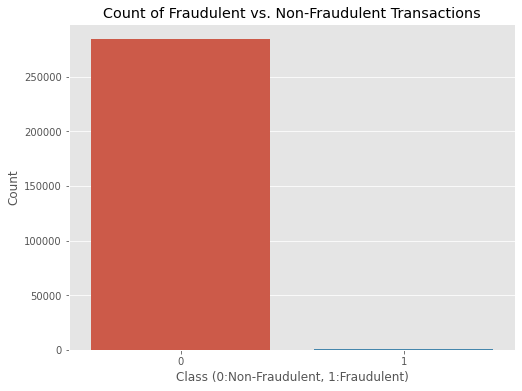



0    284315
1       492
Name: Class, dtype: int64

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


In [ ]:
# Fraudulent vs Normal Transaction
counts = df.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')
plt.show()


print('\n')
print(counts)
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('\nThere were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))


#### Discussion:

We are able to revisit the fact that throgh the bar char visualisation that the above dataset is heavily imbalanced and that only about 0.17% of the entire dataset contains fraudulent transactions.
Since its an imbalanced dataset, we will be oversampling the imbalanced class to improve the performance of the model.

Text(0.5, 1.0, 'Heatmap of Correlation')

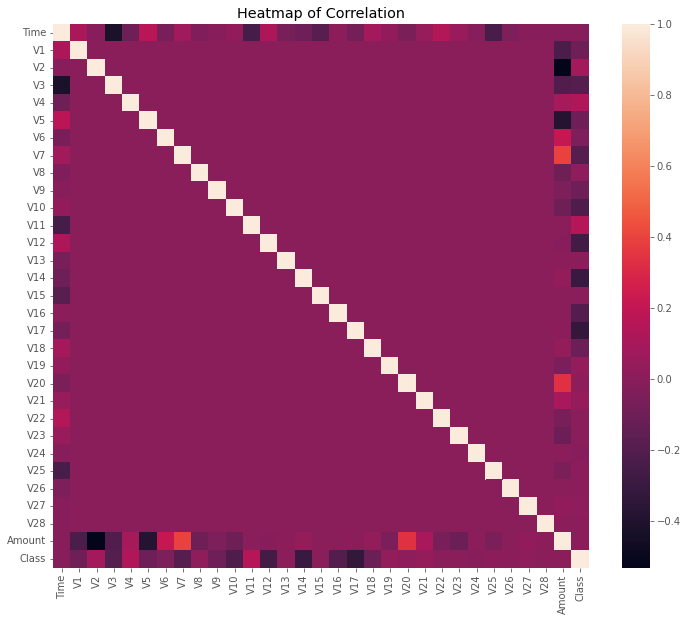

In [ ]:
# Heatmap for correlation
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

#### Discussion:

Through the Seaborn Heat Map, we can visualise how attributes are correlated with other attributes. Our main concern here is to see what attributes heavily correlate to the dependant variable which is the Class attribute.

From the above chart, we can see that there are a few variables that correlate to it in a positive manner and some in a negative manner.

## Scaling Attributes

In [ ]:
scaler_amount = StandardScaler()

#scaling the amount column
scaled_amount = scaler_amount.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount')], axis=1)

#dropping old amount and time columns
df.drop(['Amount'], axis=1, inplace=True)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
67702,52665.0,-0.349,-0.331,0.655,-1.814,0.025,0.435,-0.023,-0.027,-3.133,...,-0.387,-0.797,-0.066,-1.187,-0.172,-0.265,0.003,0.125,0,-0.107
209952,137786.0,-0.083,1.170,-1.278,-0.422,1.006,-1.137,1.136,0.040,-0.630,...,0.334,0.890,-0.009,0.696,-0.773,-0.338,0.114,0.195,0,-0.313
175186,122232.0,2.023,-0.189,-1.268,0.205,0.098,-0.620,0.067,-0.140,0.368,...,-0.264,-0.712,0.260,-0.502,-0.283,0.208,-0.080,-0.073,0,-0.285
234475,147987.0,-4.420,-0.283,-2.098,-0.430,1.247,-0.274,1.926,-1.151,0.924,...,-0.760,-0.007,0.923,0.194,-0.389,0.074,-1.650,1.436,0,0.182
161088,113860.0,0.098,0.979,-1.133,0.037,0.126,-1.304,0.738,0.139,-0.112,...,0.356,0.912,0.051,-0.112,-0.278,-0.147,-0.087,-0.042,0,-0.089


#### Discussion:

Since Time and Amount attributes had a very large range, these attributes needed to be scaled using normal distribution with unit variance.

These modified attributes are then appended to the dataset and replaces the original Amount and Time variable.

## Manual Train and Test Split

In [ ]:
# Manually train test split to handle the imbalance in the dataset.
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

no_of_frauds = train.Class.value_counts()[1]
print('\nThere are {} fraudulent transactions in the train data.'.format(no_of_frauds))

# Randomly selecting random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

selected = non_fraud.sample(no_of_frauds)
selected.head()

# Concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)
subsample = pd.concat([selected, fraud])
len(subsample)

# Shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

Train Shape: (256568, 31)
Test Shape: (28239, 31)

There are 448 fraudulent transactions in the train data.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,49604.0,1.423,-0.361,-0.479,-0.993,-0.017,-0.206,-0.209,-0.097,-1.417,...,0.224,0.613,-0.231,-0.605,0.795,-0.031,-0.014,-0.019,0,-0.322
1,145152.0,-1.527,0.648,0.615,-0.561,0.837,-0.514,0.984,-0.097,-0.063,...,-0.222,-0.393,-0.215,0.588,0.679,0.518,0.065,0.147,0,0.006
2,165981.0,-5.767,-8.402,0.057,6.951,9.881,-5.773,-5.749,0.722,-1.076,...,0.880,-0.130,2.241,0.665,-1.890,-0.121,0.073,0.584,1,-0.353
3,55140.0,-2.423,2.314,-2.530,0.036,1.787,3.506,-1.942,-0.481,-1.206,...,-1.208,0.325,0.262,0.865,0.032,-0.311,0.107,-0.005,0,-0.349
4,145046.0,0.144,1.073,-0.374,-0.535,0.930,-0.856,1.006,-0.140,-0.121,...,-0.334,-0.788,0.095,0.642,-0.412,0.108,0.226,0.086,0,-0.342
5,148818.0,0.172,-3.020,-2.655,1.248,-0.948,-0.890,1.335,-0.477,1.006,...,0.328,-0.974,-0.642,-0.121,-0.446,-0.184,-0.187,0.143,0,3.496
6,155535.0,0.711,2.617,-4.722,5.843,-0.600,-1.646,-2.785,0.540,-3.044,...,0.361,-0.866,0.140,-0.336,0.128,-0.156,0.799,0.392,1,-0.338
7,68357.0,1.233,-0.549,1.088,0.894,-1.433,-0.357,-0.717,0.003,-0.100,...,-0.449,-0.518,0.013,0.699,0.527,-0.323,0.081,0.035,1,-0.275
8,54332.0,1.458,-0.584,0.397,-0.867,-0.859,-0.300,-0.842,-0.080,-0.517,...,0.240,0.659,-0.205,-0.543,0.589,-0.045,0.027,0.013,0,-0.309
9,48205.0,-0.957,1.341,1.366,1.148,0.220,0.120,0.889,-0.213,0.269,...,-0.154,0.335,-0.215,0.104,-0.112,-0.328,-0.333,-0.476,0,-0.277


#### Discussion:

Since, the dataset we have is heavily imbalanced, we need to carefully consider when we split it into test and train. So we have randomly split the data into test and train and have taken equal quantities of fraudulent and non-fraudulent datapoints to make a subsample for training.  These dataset samples are then shuffled. The above dataset is the resulting dataset.

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

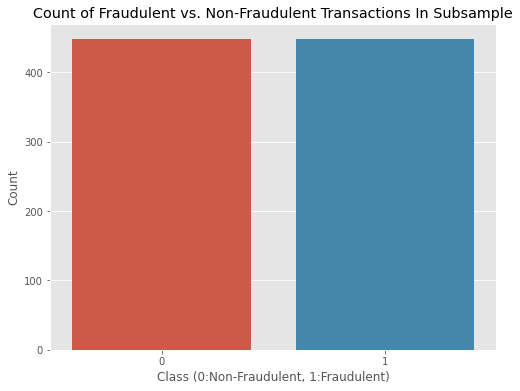

In [ ]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

#### Discussion:
After manipulating the dataset the get it balanced, we are able to see that there are equal counts of Fraudulent and Non-fraudulent datapoints.

## Dimensionality Reduction

     Class
V3  -0.561
V9  -0.563
V10 -0.637
V12 -0.688
V14 -0.755
V16 -0.607
V17 -0.564


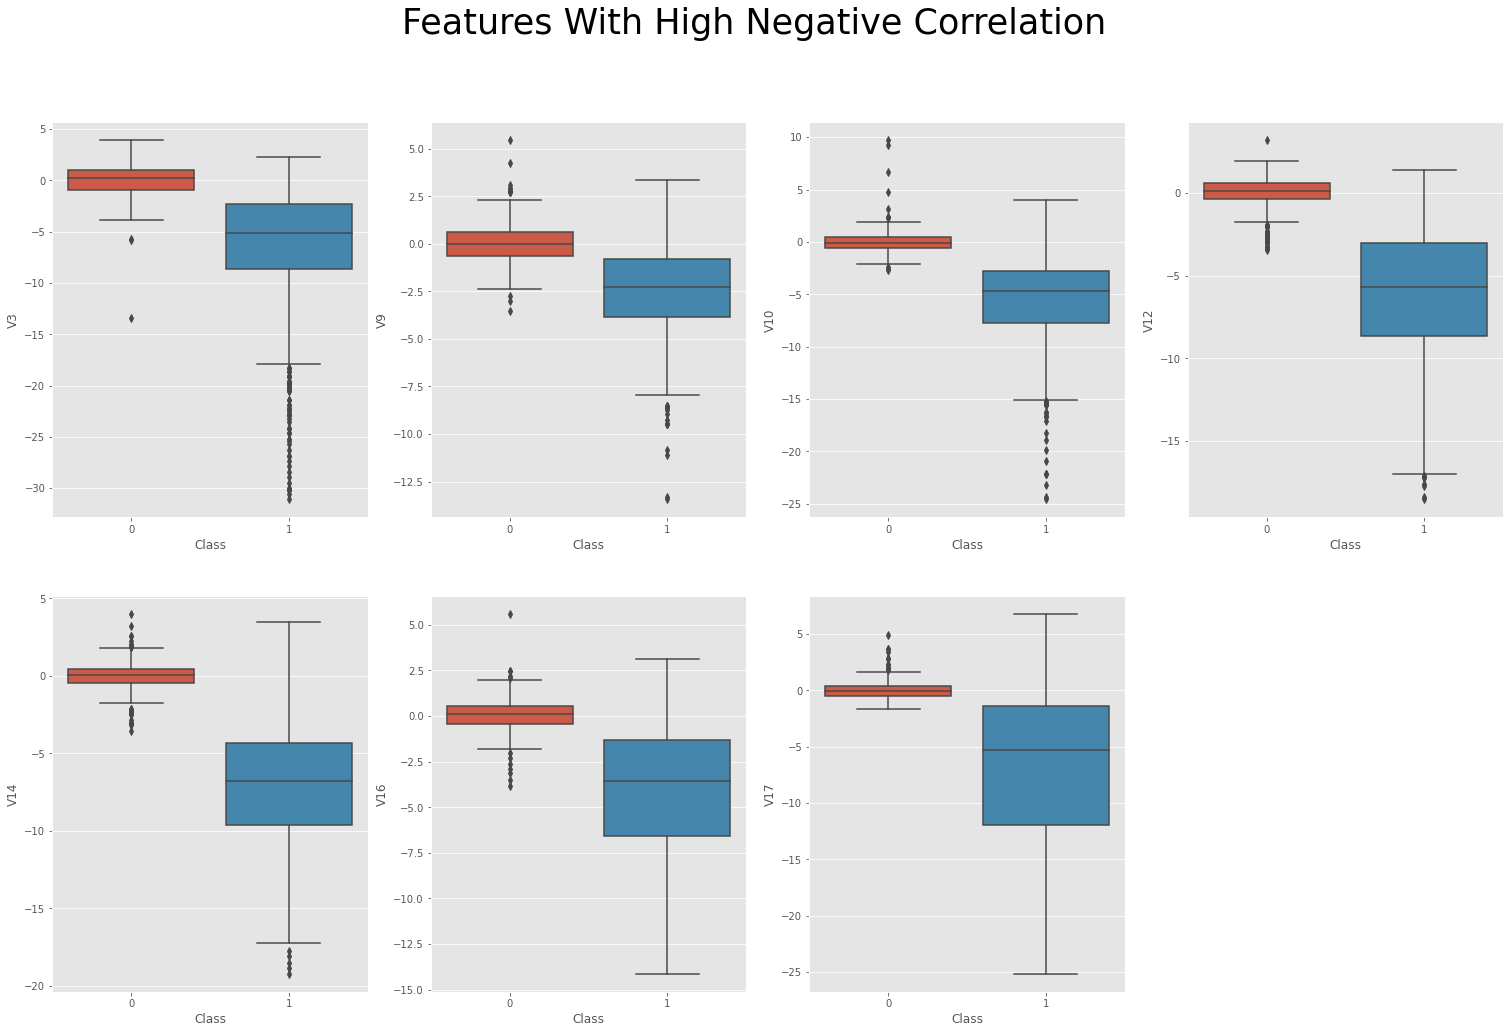

In [ ]:
corr = subsample.corr()
corr = corr[['Class']]

#Negative correlations smaller than -0.5
print(corr[corr.Class < -0.5])

f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))
f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])


#### Discussion:

We don't need all of the 30 predictors in classifying if a transaction is fraudulent or not. To optimise the classification, we just need to take attributes that are heavily correlated to the predictor.

We are able to see that there are 7 attributes that are negatively correlated to the Class attribute, namely:
  * V3  
  * V9
  * V10
  * V12
  * V14
  * V16
  * V17

The box plot shows us that there are a fair amount of outliers that need to removed as well.

       Class
V4     0.696
V11    0.695
Class  1.000


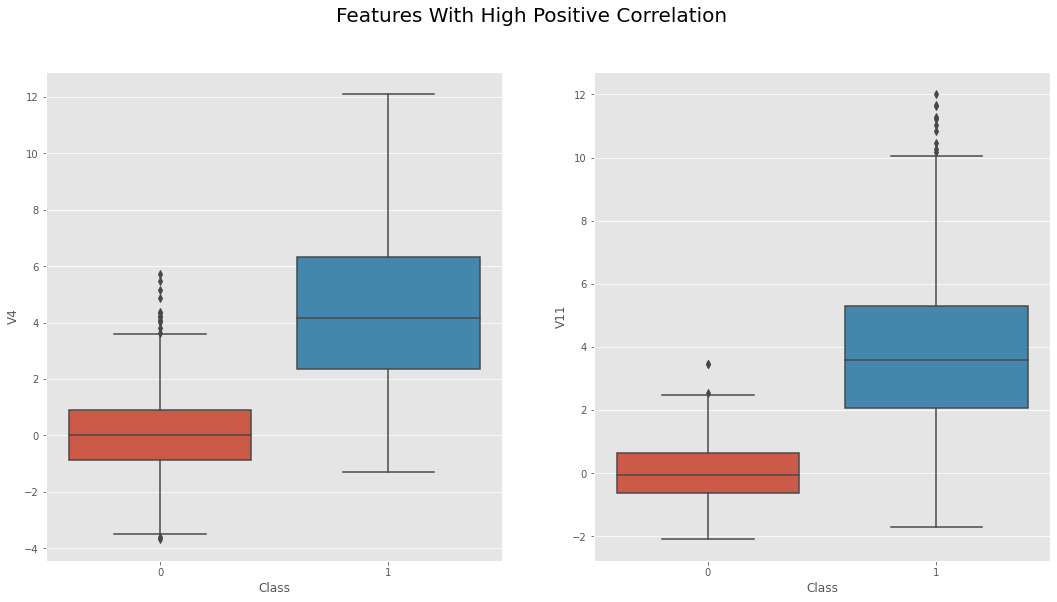

In [ ]:
#positive correlations greater than 0.5
print(corr[corr.Class > 0.5])

f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))
f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

#### Discussion:

We are able to see that there are just 2 attributes that are positively correlated to the Class attribute, namely:
  * V4
  * V11
  
The box plot shows us that there are a fair amount of outliers that need to removed as well.

## Outlier Removal

In [ ]:
# Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))


We reduced our data size from 896 transactions by 252 transactions to 644 transactions.


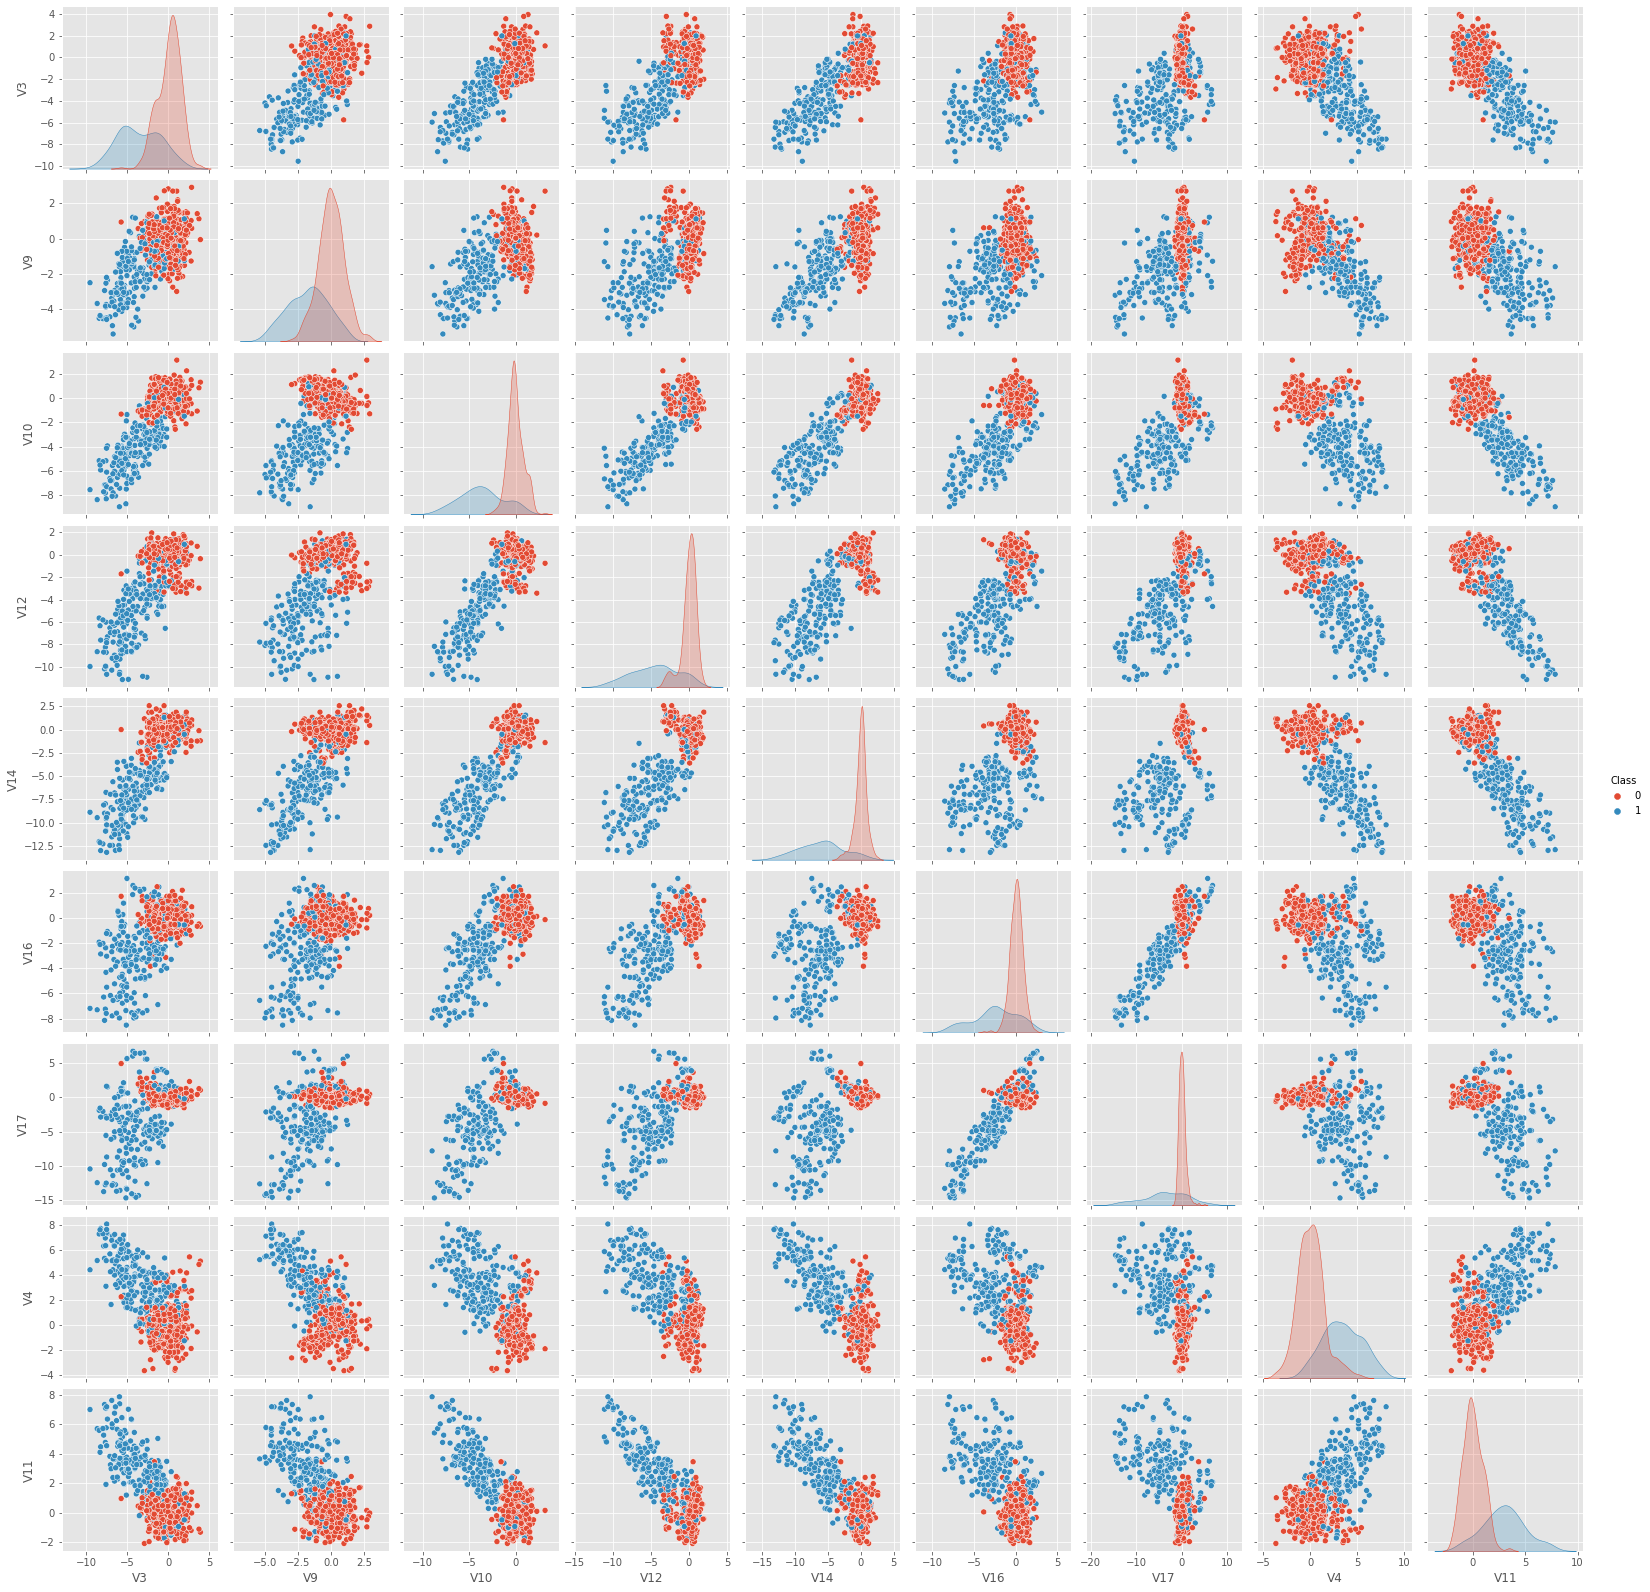

In [ ]:
df2 = df2[['V3', 'V9' , 'V10', 'V12', 'V14', 'V16', 'V17', 'V4', 'V11', 'Class']]
sns.pairplot(df2, hue="Class")

#### Discussion:

Knowing that there are outliers present in the dataset, we have decided to remove the datapoints that lie outside 2.5 times the Inter Quartile Range.

On doing so, about 250 datapoints have been removed.

#### Discussion:

On executing the above code snippet, we split the balanced dataset into test and train, where 70% of the data is taken for training and the rest 30% for testing.

## Model Fitting

In [ ]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print('Accuracy:',accuracy_score(y_test, predictions))
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('F1: %.3f' % f1_score(y_test, predictions))
print('\nConfusion Matrix:\n',confusion_matrix(y_test, predictions))

Accuracy: 0.9484536082474226
Precision: 0.943
Recall: 0.917
F1: 0.930

Confusion Matrix:
 [[118   4]
 [  6  66]]


In [ ]:
# SVM

svm = SVC()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print('Accuracy:',accuracy_score(y_test, predictions))
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('F1: %.3f' % f1_score(y_test, predictions))
print('\nConfusion Matrix:\n',confusion_matrix(y_test, predictions))

Accuracy: 0.6288659793814433
Precision: 0.000
Recall: 0.000
F1: 0.000

Confusion Matrix:
 [[122   0]
 [ 72   0]]


#### Discussion:

We have tried fitting the data into 6 different ML models, namely:

1. Logistic Regression
2. SVM

On testing these models, we are able to see that SVM performs the best compared to rest, considering the 4 metrics, namely:
  * Accuracy
  * Precision
  * Recall
  * F1

We are also able to see the confusion matrix for the above mentioned models.